In [40]:
import pandas as pd
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

# **Raw data cleaning**

In [41]:
# Useful function
def save_dict_list_as(dic, file_name):
    with open(file_name, 'wb') as file:
        pickle.dump(dic, file)
    return 0
    
def load_dict_list(file_name):
    with open(file_name, 'rb') as file:
        loaded_dict = pickle.load(file)
    return loaded_dict

In [42]:
df = pd.read_csv("data_raw/df_food_trimmed.csv", index_col=0)
df.head()

C:\Users\mathi\AppData\Local\Temp\ipykernel_15220\4220414382.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_raw/df_food_trimmed.csv", index_col=0)


,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,vitamin_b6_eaten,vitamin_c_eaten,vitamin_d_eaten,zinc_eaten,dairy_products_meat_fish_eggs_tofu,vegetables_fruits,sweets_salty_snacks_alcohol,non_alcoholic_beverages,grains_potatoes_pulses,oils_fats_nuts
371217,2578,NaN,330003,600.0,ml,bjsqab,2022-02-05 21:39:00,60,0,non_alcoholic_beverages,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,600.0,0.0,0.0
371218,2578,NaN,330102,200.0,ml,bjsqab,2022-02-06 09:46:55,60,1,non_alcoholic_beverages,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,200.0,0.0,0.0
470591,3240,NaN,330102,0.0,g,bjsqab,2022-02-06 09:46:55,60,1,unclassified,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
191430,1566,NaN,330102,110.0,g,bjsqab,2022-02-06 09:46:55,60,1,grains_potatoes_pulses,...,0.000143,0.0,0.0,0.00088,0.0,0.0,0.0,0.0,110.0,0.0
371228,2578,NaN,332686,200.0,ml,bjsqab,2022-02-06 12:30:00,60,1,non_alcoholic_beverages,...,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,200.0,0.0,0.0


In [43]:
print(df.shape)
df.info()

(383885, 56)
<class 'pandas.core.frame.DataFrame'>
Index: 383885 entries, 371217 to 203007
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   food_id                             383885 non-null  int64  
 1   barcode                             41138 non-null   object 
 2   dish_id                             383885 non-null  int64  
 3   eaten_quantity                      383865 non-null  float64
 4   eaten_unit                          383885 non-null  object 
 5   subject_key                         383885 non-null  object 
 6   eaten_at                            383885 non-null  object 
 7   eaten_at_utc_offset                 383885 non-null  int64  
 8   media_count                         383885 non-null  int64  
 9   food_group_cname                    383885 non-null  object 
 10  type                                383885 non-null  object 
 11  display_name_

In [44]:
df = df.drop(columns=['food_id', 'barcode', 'dish_id',
                        'eaten_quantity', 'eaten_unit' ,
                        'eaten_at_utc_offset','media_count',
                        'food_group_cname', 'type', 'display_name_en',
                        'display_name_fr','display_name_de', 'fallback_food_id',
                        'standard_portion_quantity','standard_portion_unit', 
                        'eaten_at', 'combined_name'                        
                        ])

df.dropna(subset=['eaten_quantity_in_gram'], inplace=True)
df['local_eaten_at'] = pd.to_datetime(df['local_eaten_at'])
df['date'] = df['local_eaten_at'].dt.date

# Sum the eaten quantity in [g] for each nutritional features for each day for each subject
df = (df.drop(columns=["local_eaten_at"])).groupby(['subject_key', 'date']).sum().reset_index()

# Filter the data to keep only the subjects with at least 1500 kcal eaten
index_to_keep = df['energy_kcal_eaten'] >= 1500
df = df[index_to_keep]

# Indicate the day of the week for each date
week_day = lambda x: x['date'].strftime('%A')
week_col = df.apply(week_day, axis=1)
df.insert(2, 'week_day', week_col)
df.head()


,subject_key,date,week_day,eaten_quantity_in_gram,energy_kcal_eaten,energy_kj_eaten,carb_eaten,fat_eaten,protein_eaten,fiber_eaten,...,vitamin_b6_eaten,vitamin_c_eaten,vitamin_d_eaten,zinc_eaten,dairy_products_meat_fish_eggs_tofu,vegetables_fruits,sweets_salty_snacks_alcohol,non_alcoholic_beverages,grains_potatoes_pulses,oils_fats_nuts
1,02ae3856ca04,2018-11-27,Tuesday,2517.0,3551.270,14898.830,475.673,129.7016,104.110,29.972,...,0.002445,0.091275,0.000003,0.007375,170.0,997.0,50.0,425.0,810.0,65.0
2,02ae3856ca04,2018-11-28,Wednesday,4570.0,4365.650,18293.800,408.205,224.6755,165.045,24.000,...,0.001921,0.054190,0.000007,0.015810,730.0,640.0,200.0,2600.0,350.0,50.0
3,02ae3856ca04,2018-11-29,Thursday,2085.0,2853.452,11903.944,265.305,150.7350,75.385,30.304,...,0.001489,0.088350,0.000002,0.006130,90.0,630.0,710.0,100.0,510.0,45.0
4,02ae3856ca04,2018-11-30,Friday,1165.0,1943.950,8147.450,228.050,75.5250,58.875,20.770,...,0.001654,0.057170,0.000001,0.007770,300.0,435.0,160.0,0.0,230.0,40.0
5,02ae3856ca04,2018-12-01,Saturday,5965.0,2738.960,11469.650,249.840,77.8555,102.382,13.317,...,0.001180,0.018920,0.000003,0.007730,625.0,150.0,2210.0,2550.0,200.0,30.0


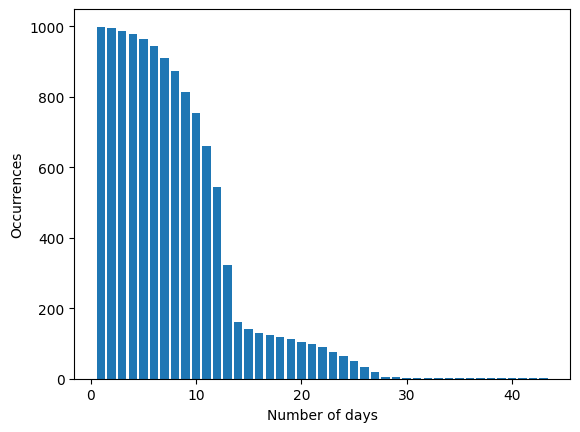

Total number of subjects : 999
Numb of subject with x NON-CONSECUTIVE in time days:
6 days ==> 943
7 days ==> 911
8 days ==> 872
9 days ==> 814
10 days ==> 755
11 days ==> 661
12 days ==> 544
13 days ==> 323
14 days ==> 161
15 days ==> 141
16 days ==> 130
17 days ==> 124
18 days ==> 117
19 days ==> 113
20 days ==> 104
21 days ==> 99
22 days ==> 89
23 days ==> 76
24 days ==> 65
25 days ==> 49
26 days ==> 33
27 days ==> 18
28 days ==> 6
29 days ==> 5


In [45]:
num = df.groupby('subject_key').count().shape[0]
df['day_num'] = df.groupby(['subject_key']).cumcount() + 1
occurrences = df['day_num'].value_counts()
plt.bar(occurrences.index, occurrences.values)
plt.xlabel('Number of days')
plt.ylabel('Occurrences')
plt.show()
l= {}

for n,i in enumerate(range(6,30)):
    subject_key_to_keep = (df[df["day_num"] == i]["subject_key"]).tolist()
    if n == 0 :
        print(f"Total number of subjects : {num}")
        print("Numb of subject with x NON-CONSECUTIVE in time days:")
    print(f"{i} days ==> {len(subject_key_to_keep)}")
df.drop(columns=['day_num'], inplace=True)
df.to_csv("data_set/clean_data.csv", index=False)

### **Prep. Data for analysis**
- Only keep subject with complete week (days consecutive in time)


In [46]:
df = pd.read_csv('data_set/clean_data.csv')
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Prep the differents nutritional features
eaten_columns = [col for col in df.columns if 'eaten' in col]
food_columns = df.columns[-6:].to_list()
features = eaten_columns + food_columns
save_dict_list_as(features, 'Food_group/features.pkl')

# Only keep features of interest
data = df[["subject_key","week_day", "date"]+features]

# Prep demographic feature of interest
meta = pd.read_csv('data_raw/fay_meta_aug.csv')
meta_col = ["gender", "age", "age_group", "bmi_cat"]
meta = meta[meta_col + ["subject_app_key"]]
meta.rename(columns={"subject_app_key": "subject_key"}, inplace=True)
meta.to_csv('data_set/meta.csv', index=False)

# Filter data to keep only complete weeks (with consecutive in time days)
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by=['subject_key', 'date'])
data['week_of_year'] = data['date'].dt.isocalendar().week
data = data.groupby(['subject_key', 'week_of_year']).filter(lambda x: len(x) == 7)


In [47]:
greater = data.groupby("subject_key")["week_of_year"].nunique() == 1
true_count = greater.value_counts()[True]
false_count = greater.value_counts()[False]
print(f"Number of subject with multiple comlpete weeks (> 1): {false_count}")
print(f"Number of subject with only one complete week: {true_count}")
print(f"Total number of subject with a least one complete week: {true_count + false_count}")

Number of subject with multiple comlpete weeks (> 1): 63
Number of subject with only one complete week: 390
Total number of subject with a least one complete week: 453


In [48]:
# # Filter data to keep only complete weeks during COVID restriction in Switzerland
# switzerland_lockdowns = [
#     (datetime(2020, 3, 16), datetime(2020, 5, 11)),  # First strict lockdown
#     (datetime(2020, 12, 22), datetime(2021, 3, 1)),  # bars, restaurants, and cultural venues closed
#     (datetime(2021, 3, 1), datetime(2021, 5, 31)),   # Progressiv reopening
#     (datetime(2021, 9, 13), datetime(2022, 2, 17)),  # COVID certificate needed
# ]

# def check_lockdown(date, lockdowns):
#     return any(start <= date <= end for start, end in lockdowns)


# data_covid = data.copy()
# data_covid['lock_down'] = data_covid['date'].apply(lambda x: check_lockdown(x, switzerland_lockdowns))
# covid = data_covid[data_covid["lock_down"] == True]
# covid = covid.groupby(['subject_key', 'week_of_year']).filter(lambda x: len(x) == 7)

# # If a subject has multiple complete weeks during COVID restriction, we tke the avg (on each days) to have one representative week
# covid = covid.groupby(["subject_key", "week_day"])[features].mean().reset_index()    

# # Add demographic features
# covid= pd.merge(covid, meta, on="subject_key")

# covid['day_of_week_order'] = covid['week_day'].apply(lambda x: week.index(x))
# covid= covid.sort_values(by=['subject_key','day_of_week_order'])
# covid.drop(columns=['day_of_week_order'], inplace=True)
# covid.reset_index(inplace=True, drop = True)
# day_num = covid.groupby('subject_key').cumcount() + 1
# covid.insert(2, 'day_num', day_num)

# print("Number of subject with fully consecutive week during COVID restriction in Switzerland:",len(covid.groupby("subject_key")))
# print(f"Data Covid shape: {covid.shape}")


(Filter subject with multiple complete Week for comparaison of week analysis)

In [49]:
subj_full_week = data.copy()
subj_full_week = pd.merge(subj_full_week, meta, on="subject_key")
key = subj_full_week.groupby("subject_key")["week_of_year"].nunique() > 1
subj_full_week = subj_full_week[subj_full_week['subject_key'].isin(key[key].index)]
subj_full_week['day_of_week_order'] = subj_full_week['week_day'].apply(lambda x: week.index(x))
subj_full_week= subj_full_week.sort_values(by=['subject_key','week_of_year','day_of_week_order'])
subj_full_week.drop(columns=['day_of_week_order'], inplace=True)
subj_full_week.reset_index(inplace=True, drop = True)
day_num = subj_full_week.groupby('subject_key').cumcount() + 1
subj_full_week.insert(2, 'day_num', day_num)
display(subj_full_week.head())
print("Number of subject with multiple week:", len(subj_full_week.groupby("subject_key").count()))


# Contains only subjects with multiple complete weeks
subj_full_week.to_csv('data_set/subject_full_week.csv', index=False)






,subject_key,week_day,day_num,date,eaten_quantity_in_gram,energy_kcal_eaten,energy_kj_eaten,carb_eaten,fat_eaten,protein_eaten,...,vegetables_fruits,sweets_salty_snacks_alcohol,non_alcoholic_beverages,grains_potatoes_pulses,oils_fats_nuts,week_of_year,gender,age,age_group,bmi_cat
0,2qe5nq,Monday,1,2020-02-17,2422.5,2480.100,10413.95,331.2750,92.236,72.769,...,50.0,897.5,850.0,300.0,60.0,8,female,45,35-49,Normal
1,2qe5nq,Tuesday,2,2020-02-18,2862.5,2517.565,10547.82,327.4065,96.323,70.891,...,180.0,857.5,1050.0,370.0,50.0,8,female,45,35-49,Normal
2,2qe5nq,Wednesday,3,2020-02-19,2855.0,2127.130,8913.59,239.3180,89.712,86.747,...,165.0,470.0,1000.0,320.0,10.0,8,female,45,35-49,Normal
3,2qe5nq,Thursday,4,2020-02-20,2862.0,1922.770,8069.24,226.5930,72.157,83.857,...,45.0,447.0,1400.0,540.0,20.0,8,female,45,35-49,Normal
4,2qe5nq,Friday,5,2020-02-21,2780.5,1868.955,7826.95,232.6068,76.620,46.992,...,0.0,430.5,1300.0,450.0,15.0,8,female,45,35-49,Normal


Number of subject with multiple week: 63


In [50]:
# If a subject has multiple complete weeks, we tke the avg (on each days) to have one representative week
data = data.groupby(["subject_key","week_day"])[features].mean().reset_index()

# Add demographic features  
data = pd.merge(data, meta, on="subject_key")

# Sort data by subject and day of week (Mon-Sun)
data['day_of_week_order'] = data['week_day'].apply(lambda x: week.index(x))
data= data.sort_values(by=['subject_key','day_of_week_order'])
data.drop(columns=['day_of_week_order'], inplace=True)
data.reset_index(inplace=True, drop = True)
day_num = data.groupby('subject_key').cumcount() + 1
data.insert(2, 'day_num', day_num)

print(f"Number of subject with representation of 1 fully consecutive week : {len(data.groupby('subject_key'))}")
print(f"Data shape:{data.shape}")

Number of subject with representation of 1 fully consecutive week : 453
Data shape:(3171, 44)


In [51]:
data.to_csv('data_set/data_for_analysis.csv', index=False)
# "data" contains the nutritional data for one representative week (Mon_Sun) for each subject
# Nb of subject:  453 | 37 nutritional features | 4 demographic features


# covid.to_csv('data_set/data_covid_for_analysis.csv', index=False)
# # "data_covid" contains the nutritional data for one representative week (Mon_Sun) for each subject during COVID restriction in Switzerland
# # Nb of subject:  148 | 37 nutritional features | 4 demographic features

In [52]:
display(data.head(14))
# covid.head(14)

,subject_key,week_day,day_num,eaten_quantity_in_gram,energy_kcal_eaten,energy_kj_eaten,carb_eaten,fat_eaten,protein_eaten,fiber_eaten,...,dairy_products_meat_fish_eggs_tofu,vegetables_fruits,sweets_salty_snacks_alcohol,non_alcoholic_beverages,grains_potatoes_pulses,oils_fats_nuts,gender,age,age_group,bmi_cat
0,244bwh,Monday,1,2895.0,1844.100,7659.580,53.2160,124.21500,116.1920,17.990,...,501.0,490.0,40.0,1800.0,0.0,50.0,female,64,65+,Overweight
1,244bwh,Tuesday,2,3323.5,2602.380,10868.470,221.3185,120.50350,102.0795,33.938,...,462.0,835.0,415.0,1300.0,240.0,71.5,female,64,65+,Overweight
2,244bwh,Wednesday,3,2355.0,1814.705,7550.980,107.0605,113.82925,76.2939,21.295,...,246.0,675.0,45.0,1200.0,103.0,72.0,female,64,65+,Overweight
3,244bwh,Thursday,4,1881.0,2609.960,10904.890,221.8240,129.66000,120.9790,28.125,...,472.0,235.0,70.0,500.0,580.0,10.0,female,64,65+,Overweight
4,244bwh,Friday,5,2474.0,2111.490,8767.050,117.2990,136.43700,84.7590,26.334,...,208.0,555.0,92.0,1450.0,120.0,35.0,female,64,65+,Overweight
5,244bwh,Saturday,6,2989.5,1972.825,8238.275,156.8985,94.90260,98.0590,24.457,...,590.5,580.0,100.0,1500.0,170.0,25.0,female,64,65+,Overweight
6,244bwh,Sunday,7,2538.0,1816.990,7557.960,47.1150,122.65700,121.6930,14.770,...,514.0,550.0,20.0,1400.0,40.0,0.0,female,64,65+,Overweight
7,2857fm,Monday,1,3127.0,3358.690,14080.800,423.4350,139.27500,92.6750,24.285,...,40.0,295.0,142.0,1650.0,970.0,30.0,male,26,18-34,Normal
8,2857fm,Tuesday,2,2467.0,1816.310,7623.800,264.5850,59.10500,46.2200,20.675,...,180.0,440.0,212.0,1200.0,415.0,20.0,male,26,18-34,Normal
9,2857fm,Wednesday,3,2965.0,2337.260,9793.100,284.5960,100.01440,63.4440,27.493,...,45.0,645.0,165.0,1800.0,260.0,50.0,male,26,18-34,Normal
